Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch: 0050 cost= 0.122978039 W= 0.3695857 b= -0.061748117
Epoch: 0100 cost= 0.117660537 W= 0.36244923 b= -0.010408642
Epoch: 0150 cost= 0.112957329 W= 0.3557371 b= 0.03787738
Epoch: 0200 cost= 0.108797491 W= 0.34942427 b= 0.08329153
Epoch: 0250 cost= 0.105118267 W= 0.3434869 b= 0.12600476
Epoch: 0300 cost= 0.101864189 W= 0.33790267 b= 0.16617769
Epoch: 0350 cost= 0.098986119 W= 0.33265048 b= 0.20396125
Epoch: 0400 cost= 0.096440636 W= 0.32771066 b= 0.23949787
Epoch: 0450 cost= 0.094189376 W= 0.32306466 b= 0.27292058
Epoch: 0500 cost= 0.092198305 W= 0.31869495 b= 0.30435598
Epoch: 0550 cost= 0.090437405 W= 0.31458518 b= 0.33392134
Epoch: 0600 cost= 0.088880084 W= 0.31071997 b= 0.36172834
Epoch: 0650 cost= 0.087502785 W= 0.30708438 b= 0.38788193
Epoch: 0700 cost= 0.086284786 W= 0.3036652 b= 0.41247952
Epoch: 0750 cost= 0.085207656 W= 0.3004494 b= 0.4356137
Epoch: 0800 cost= 0.084255084 W= 0.297

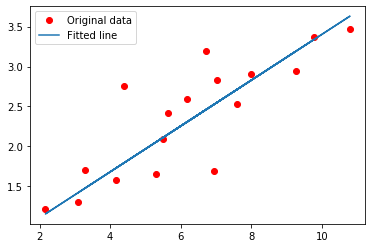

In [1]:
'''
A linear regression learning algorithm example using TensorFlow library.
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
